In [ ]:
#By intern Lolitha for SHMT internship

In [ ]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import itertools # advanced tools

In [ ]:
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score #Evaluation Metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/SHMT/FD/Fraud.csv")

df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
#Dropping all the unnecessary columns
df=df.drop(['type','nameOrig','nameDest'],axis=1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   amount          1048575 non-null  float64
 2   oldbalanceOrg   1048575 non-null  float64
 3   newbalanceOrig  1048575 non-null  float64
 4   oldbalanceDest  1048575 non-null  float64
 5   newbalanceDest  1048575 non-null  float64
 6   isFraud         1048575 non-null  int64  
 7   isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 64.0 MB


In [ ]:
df.dtypes

step                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

### Exploratory Data Analysis

In [ ]:
df.isnull().sum()

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
#Getting fraud and n normal dataset
fraud=df[df['isFraud']==1]
valid=df[df['isFraud']==0]
print(fraud.shape)
print(valid.shape)

(1142, 8)
(1047433, 8)


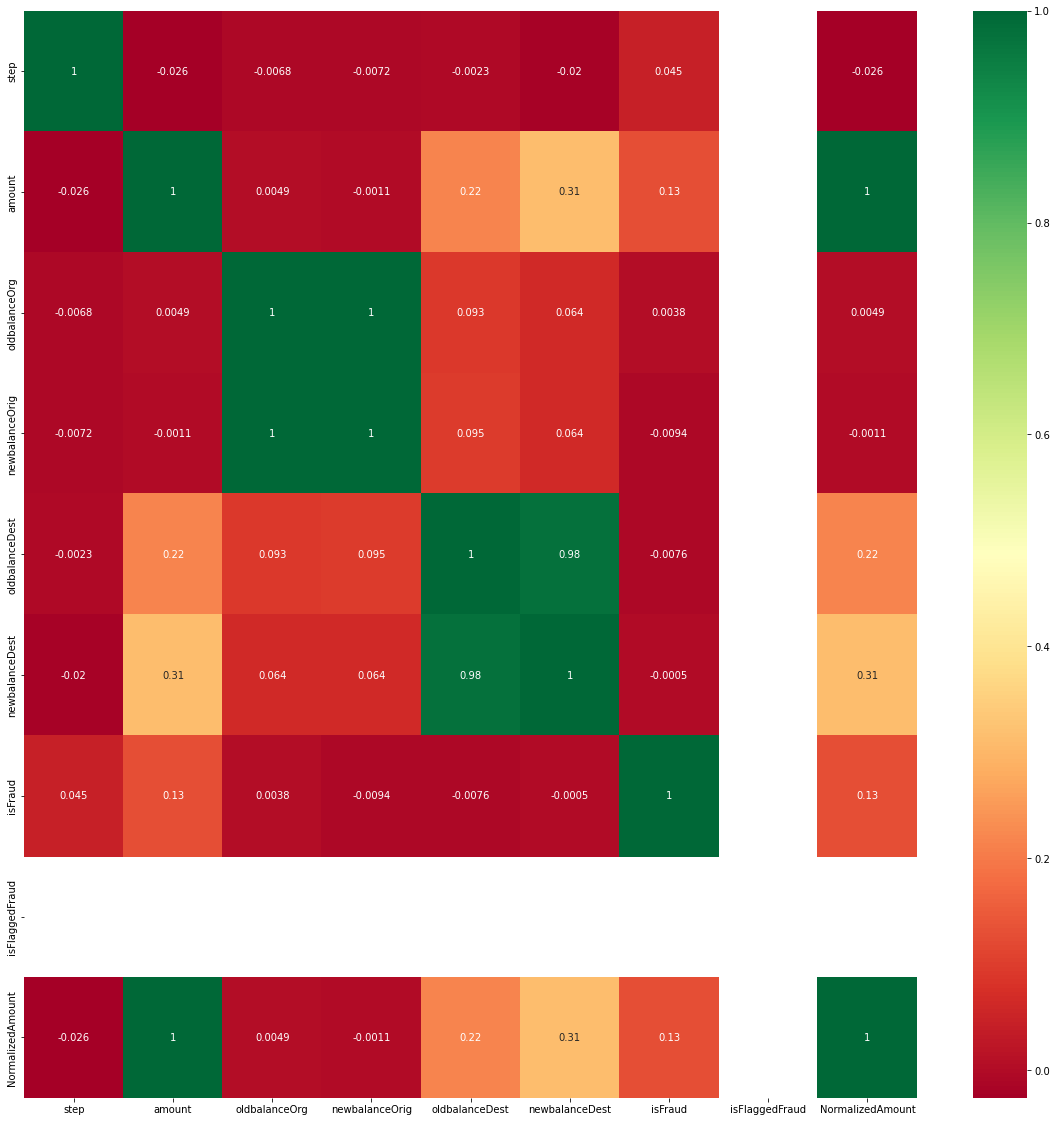

In [ ]:
##Correlation
#get correlations of reach feature in dataset
cm=df.corr()
top_corr_features=cm.index
plt.figure(figsize=(20,20))
#Plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True, cmap="RdYlGn")

(0.0, 800000.0)

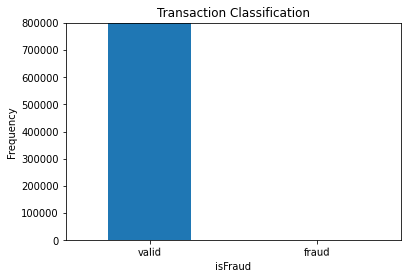

In [ ]:


LABELS=['valid','fraud']
fraud_types=pd.value_counts(df['isFraud'],sort=True)
fraud_types.plot(kind='bar',rot=1)

plt.title("Transaction Classification")
plt.xticks(range(2),LABELS)
plt.xlabel('isFraud')
plt.ylabel("Frequency")
plt.ylim(0,800000)




In [ ]:
#We can observe that the genuine transactions are over 99%! This is not good.
#Let’s apply scaling techniques on the “Amount” feature to transform the range of values. We drop the original “Amount” column and add a new column with the scaled values. 

In [ ]:

sc = StandardScaler()
amount = df['amount'].values

df['NormalizedAmount'] = sc.fit_transform(amount.reshape(-1, 1))

print(cl(df['NormalizedAmount'].head(10), attrs = ['bold']))



0   -0.561738
1   -0.591840
2   -0.598194
3   -0.598194
4   -0.554837
5   -0.569370
6   -0.572049
7   -0.569204
8   -0.583687
9   -0.578730
Name: NormalizedAmount, dtype: float64


In [ ]:
print(fraud_types)

0    1047433
1       1142
Name: isFraud, dtype: int64


In [ ]:
#Fraud Case Amount statistics
fraud.amount.describe()

count    1.142000e+03
mean     1.192629e+06
std      2.030599e+06
min      1.190000e+02
25%      8.607017e+04
50%      3.531794e+05
75%      1.248759e+06
max      1.000000e+07
Name: amount, dtype: float64

In [ ]:
#Non Fraud Case Amount statistics
valid.amount.describe()

count    1.047433e+06
mean     1.575397e+05
std      2.541883e+05
min      1.000000e-01
25%      1.213487e+04
50%      7.621497e+04
75%      2.134928e+05
max      6.419835e+06
Name: amount, dtype: float64

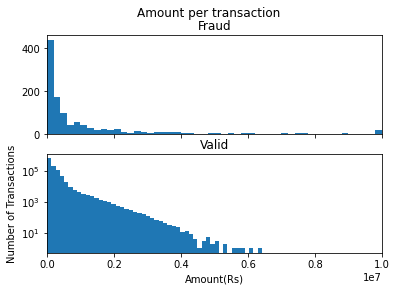

In [ ]:
f, (ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle('Amount per transaction')
bins=50
ax1.hist(fraud.amount,bins=bins)
ax1.set_title('Fraud')
ax2.hist(valid.amount,bins=bins)
ax2.set_title("Valid")
plt.xlabel('Amount(Rs)')
plt.ylabel('Number of Transactions')
plt.xlim(0,10000000)
plt.yscale('log')
plt.show();

In [ ]:
## Take some sample of the data

df1= df.sample(frac = 0.1,random_state=1)

df1.shape

(104858, 9)

In [ ]:

outlier_fraction=len(fraud)/float(len(valid))
print('Outlier_fraction:{}'.format(outlier_fraction))
print('Fraud Cases :{}'.format(len(fraud)))
print("Valid Cases : {}".format(len(valid)))

Outlier_fraction:0.0010902845337124188
Fraud Cases :1142
Valid Cases : 1047433


**Feature Selection & Data Split**



> Indented block



In this process, we are going to define the independent (X) and the dependent variables (Y). Using the defined variables, we will split the data into a training set and testing set which is further used for modeling and evaluating. We can split the data easily using the ‘train_test_split’ algorithm in python.

In [ ]:
# DATA SPLIT

X = df.drop('isFraud', axis = 1).values
y = df['isFraud'].values

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



**Modeling**

> Indented block

> Indented block




In this step, we will be building six different types of classification models namely Decision Tree, K-Nearest Neighbors (KNN), Logistic Regression, Support Vector Machine (SVM), Random Forest, and XGBoost. Even though there are many more models which we can use, these are the most popular models used for solving classification problems. All these models can be built feasibly using the algorithms provided by the scikit-learn package. Only for the XGBoost model, we are going to use the xgboost package. Let’s implement these models in python and keep it in mind that the algorithms used might take time to get implemented.

In [ ]:
#Python Implementation:


In [ ]:
#Data Modelling

#1. Decision Tree
TM=DecisionTreeClassifier(max_depth=4,criterion='entropy')
TM.fit(X_train,y_train)
TM_pred=TM.predict(X_test)



In [ ]:
#2 K_Nearest Neighbors

n=5
knn=KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)





In [ ]:
#3. Logistic Regression
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)



In [ ]:
#4. SVM
svm=SVC()
svm.fit(X_train,y_train)
svm_pred=svm.predict(X_test)



In [ ]:
#5.Random Forest Tree
rf= RandomForestClassifier(max_depth=4)
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)


In [ ]:

#6. XGBoost
xgb=XGBClassifier(max_depth=4)
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)

In the above code, we have built six different types of classification models starting from the Decision tree model to the XGBoost model. 

Now let’s breakdown the code.

Starting with the decision tree, we have used the ‘DecisionTreeClassifier’ algorithm to build the model. Inside the algorithm, we have mentioned the ‘max_depth’ to be ‘4’ which means we are allowing the tree to split four times and the ‘criterion’ to be ‘entropy’ which is most similar to the ‘max_depth’ but determines when to stop splitting the tree. Finally, we have fitted and stored the predicted values into the ‘tree_yhat’ variable.

Next is the K-Nearest Neighbors (KNN). We have built the model using the ‘KNeighborsClassifier’ algorithm and mentioned the ‘n_neighbors’ to be ‘5’. The value of the ‘n_neighbors’ is randomly selected but can be chosen optimistically through iterating a range of values, followed by fitting and storing the predicted values into the ‘knn_pred’ variable.

There is nothing much to explain about the code for Logistic regression as we kept the model in a way more simplistic manner by using the ‘LogisticRegression’ algorithm and as usual, fitted and stored the predicted variables in the ‘lr_pred’ variable.

We built the Support Vector Machine model using the ‘SVC’ algorithm and we didn’t mention anything inside the algorithm as we managed to use the default kernel which is the ‘rbf’ kernel. After that, we stored the predicted values into the ‘svm_pred’ after fitting the model.

The next model is the Random forest model which we built using the ‘RandomForestClassifier’ algorithm and we mentioned the ‘max_depth’ to be 4 just like how we did to build the decision tree model. 

Finally, fitting and storing the values into the ‘rf_pred’. Remember that the main difference between the decision tree and the random forest is that, decision tree uses the entire dataset to construct a single model whereas, the random forest uses randomly selected features to construct multiple models. That’s the reason why the random forest model is used versus a decision tree.

Our final model is the XGBoost model. We built the model using the ‘XGBClassifier’ algorithm provided by the xgboost package. We mentioned the ‘max_depth’ to be 4 and finally, fitted and stored the predicted values into the ‘xgb_pred’.
With that, we have successfully built our six types of classification models and interpreted the code for easy understanding. Our next step is to evaluate each of the models and find which is the most suitable one for our case.

Evaluation

As I said before, in this process we are going to evaluate our built models using the evaluation metrics provided by the scikit-learn package. Our main objective in this process is to find the best model for our given case. The evaluation metrics we are going to use are the accuracy score metric, f1 score metric, and finally the confusion matrix.
1. Accuracy score

Accuracy score is one of the most basic evaluation metrics which is widely used to evaluate classification models. The accuracy score is calculated simply by dividing the number of correct predictions made by the model by the total number of predictions made by the model (can be multiplied by 100 to transform the result into a percentage). It can generally be expressed as:
Accuracy score = No.of correct predictions / Total no.of predictions
Let’s check the accuracy score of the six different classification models we built. To do it in python, we can use the ‘accuracy_score’ method provided by the scikit-learn package.

In [ ]:
#1. Accuracy Score
print('ACCURACY SCORE')
print('-----------------------------------------------------')
print('Accuracy Score of the Decision Tree MOdel is {}'.format(accuracy_score(y_test,TM_pred)))
print('-----------------------------------------------------')
print('Accuracy Score of the KNN MOdel is {}'.format(accuracy_score(y_test,knn_pred)))
print('-----------------------------------------------------')
print('Accuracy Score of the Logistic Regression MOdel is {}'.format(accuracy_score(y_test,lr_pred)))
print('-----------------------------------------------------')
print('Accuracy Score of the SVM MOdel is {}'.format(accuracy_score(y_test,svm_pred)))
print('-----------------------------------------------------')
print('Accuracy Score of the Random Forest Tree MOdel is {}'.format(accuracy_score(y_test,rf_pred)))
print('-----------------------------------------------------')
print('Accuracy Score of the XG Boost MOdel is {}'.format(accuracy_score(y_test,xgb_pred)))
print('-----------------------------------------------------')

According to the accuracy score evaluation metric, the KNN model reveals to be the most accurate model and the Logistic regression model to be the least accurate model. However, when we round up the results of each model, it shows 0.99 (99% accurate) which is a very good score.

2. F1 Score

The F1 score or F-score is one of the most popular evaluation metrics used for evaluating classification models. It can be simply defined as the harmonic mean of the model’s precision and recall. It is calculated by dividing the product of the model’s precision and recall by the value obtained on adding the model’s precision and recall and finally multiplying the result with 

2. It can be expressed as:
F1 score = 2( (precision * recall) / (precision + recall) )

The F1 score can be calculated easily in python using the ‘f1_score’ method provided by the scikit-learn package.

In [ ]:
#Python Implementation

In [ ]:
#2. F1 Score
print('F1 SCORE')
print('-------------------------------------------------')
print('F1 score of the Decision Tree Model is {}.format(f1_score(y_test,TM_pred')))
print('-------------------------------------------------')
print('F1 score of the KNN Model is {}.format(f1_score(y_test,knn_pred')))
print('-------------------------------------------------')
print('F1 score of the Logistic Regression  Model is {}.format(f1_score(y_test,lr_pred')))
print('-------------------------------------------------')
print('F1 score of the SVM Model is {}.format(f1_score(y_test,svm_pred')))
print('-------------------------------------------------')
print('F1 score of the Random Forest Model is {}.format(f1_score(y_test,rf_pred')))
print('-------------------------------------------------')
print('F1 score of the XG BOOST Model is {}.format(f1_score(y_test,xgb_pred')))
print('-------------------------------------------------')

The ranking of the models is almost similar to the previous evaluation metric. On basis of the F1 score evaluation metric, the KNN model snatches the first place again and the Logistic regression model remains to be the least accurate model.

3. Confusion Matrix

Typically, a confusion matrix is a visualization of a classification model that shows how well the model has predicted the outcomes when compared to the original ones. Usually, the predicted outcomes are stored in a variable that is then converted into a correlation table. Using the correlation table, the confusion matrix is plotted in the form of a heatmap. Even though there are several built-in methods to visualize a confusion matrix, we are going to define and visualize it from scratch for better understanding. Let’s do it in python!

In [ ]:
#3. Confusion MAtrix
#Defining the plot function
def plot_confusion_matrix(cm,classes,title,normalize=False,cmap=plt.cm.Blues):
  title="Confusion Matrix of {}".format(title)

  if normalize:
    cm=cm.astype(float)/cf.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    ticks_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)


In [ ]:

# 3. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

tree_matrix = confusion_matrix(y_test, TM_pred, labels = [0, 1]) # Decision Tree
knn_matrix = confusion_matrix(y_test, knn_pred, labels = [0, 1]) # K-Nearest Neighbors
lr_matrix = confusion_matrix(y_test, lr_pred, labels = [0, 1]) # Logistic Regression
svm_matrix = confusion_matrix(y_test, svm_pred, labels = [0, 1]) # Support Vector Machine
rf_matrix = confusion_matrix(y_test, rf_pred, labels = [0, 1]) # Random Forest Tree
xgb_matrix = confusion_matrix(y_test, xgb_pred, labels = [0, 1]) # XGBoost

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)

# 1. Decision tree

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()

# 2. K-Nearest Neighbors

knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()

# 3. Logistic regression

lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()

# 4. Support Vector Machine

svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()

# 5. Random forest tree

rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.savefig('rf_cm_plot.png')
plt.show()

# 6. XGBoost

xgb_cm_plot = plot_confusion_matrix(xgb_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'XGBoost')
plt.savefig('xgb_cm_plot.png')
plt.show()
